### Алгоритмы анализа данных (06 окт 2022 - 08 ноя 2022)
### Урок 2. Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

# Домашнее задание студента Бакеева А.П.
Сдайте задание до: 18 окт., 00:00 MSK

__1.__ Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки (MSE) от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

__2.__ Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

Загружаем необходимые библиотеки и функции

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d.axes3d import Axes3D

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# функция, определяющяя среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

__Решение 1__

In [3]:
# в теории sgd должен работать быстрее, когда у нас большой массив признаков
# поэтому сгенерируем тяжелый набор данных: n_samples=700000, n_features=35, n_informative=25

X, Y, coef = datasets.make_regression(n_samples=700000, n_features=35, n_informative=25, n_targets=1, 
                                      noise=5, coef=True, random_state=21)

# X[:, 0] *= 10 не будем менять масштаб данных, чтобы не заниматься нормализацией
# X[:, 1] *= 25

display(X, coef, Y)

array([[ 1.06464237, -0.31860641, -0.79152115, ...,  2.16361464,
        -1.58301431, -0.7269067 ],
       [-1.16648923, -1.23287454,  1.7653891 , ...,  0.32654607,
        -2.00043721, -0.79906519],
       [-1.55599762, -0.77934403,  1.24193959, ..., -1.60004909,
         0.13009714,  0.32640551],
       ...,
       [-1.29287598, -0.55045209, -3.19920646, ...,  0.35482484,
         0.06904269, -0.5739496 ],
       [-0.58883257, -0.01533388,  1.62123071, ..., -0.77088675,
        -0.24973172,  1.62172819],
       [ 0.14333684,  1.21910702, -0.67390985, ...,  0.21877646,
         0.33925785, -1.03130901]])

array([89.90397689, 14.05105681, 84.89287943, 84.32492947,  1.83700566,
       60.8697176 ,  0.        ,  0.        , 40.42989803,  0.        ,
       29.25410333,  0.        ,  0.        , 45.25234961,  6.34122418,
        0.        ,  0.        , 64.53152069, 95.98339009, 69.053052  ,
        0.        , 89.81735435, 92.64132775, 44.70591003, 41.30677972,
       22.77369565, 68.60152541, 50.63621443, 78.52770633,  0.        ,
       92.59645841, 82.5367954 ,  9.89624146, 52.15291748,  0.        ])

array([-534.00226703, -391.12428732, -197.68941718, ..., -306.0133861 ,
        155.94469551,  169.69912818])

Найдем решение с помощью стохастического градиентного спуска

In [4]:
%%time

# стохастический градиентный спуск

# инициализируем начальный вектор весов
w = np.zeros(X.shape[1])

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors_sgd = []

# шаг градиентного спуска
eta = 2e-2

# максимальное число итераций
max_iter = 900

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

np.random.seed(1234)

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0], size=1)
    
    y_pred = np.dot(X[train_ind], w)
    new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

    weight_dist = np.linalg.norm(new_w - w, ord=2)
 
    y = X.dot(w)
    error = calc_mse(y, Y)
    
    w_list.append(new_w.copy())
    errors_sgd.append(error)    
    
    if iter_num % 100 == 0:
        eta /= 1.1
        print(f'Iteration #{iter_num}: W_new = {new_w}, MSE = {round(error, 2)}, weight_dist = {weight_dist}')        

    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(f'Iter {iter_num}: error = {error}, weights: {new_w}')
print(f'В случае использования стохастического градиентного спуска ошибка составляет {round(errors_sgd[-1], 4)}')

Iteration #0: W_new = [ -7.07946826  12.94245687   9.31941276   0.7574106   21.08787628
  -8.32217112 -13.67422513   1.72799251  12.49287512   6.57547206
   1.02705221  -3.13156775  -4.54629037  10.74474961  -9.6960598
  11.94504807  -4.2500144    3.65772417   3.52696291   3.40774735
  13.31066308  10.98398984  -7.21635899   3.68651438   3.47946572
  -6.74833025   4.88536006   1.13376604 -14.01598163  -5.64315876
  -0.45033223   5.0343271   16.54697366  -2.65058367  -7.31703094], MSE = 101440.62, weight_dist = 51.787573806336404
Iteration #100: W_new = [ 60.48559232  28.97478621  83.85890552  83.59352176  -7.65420494
  63.41675794  -4.12651931   2.59887486  33.80822145  -1.17816794
  -2.98283904 -22.98247431  10.42063914  -1.69968078   0.88472644
  24.67037669 -22.09943248  78.61021426  91.54758193  83.93762983
 -12.729114    65.97552261  97.98375051  45.29679566  15.11400327
   3.349795    22.28371418  41.80108614  86.93282501  -2.20245819
  96.99799515  76.56571836   3.12720091  42.4

In [5]:
# для сравнения теоритические веса модели:
#  array([89.90397689, 14.05105681, 84.89287943, 84.32492947,  1.83700566,
#        60.8697176 ,  0.        ,  0.        , 40.42989803,  0.        ,
#        29.25410333,  0.        ,  0.        , 45.25234961,  6.34122418,
#         0.        ,  0.        , 64.53152069, 95.98339009, 69.053052  ,
#         0.        , 89.81735435, 92.64132775, 44.70591003, 41.30677972,
#        22.77369565, 68.60152541, 50.63621443, 78.52770633,  0.        ,
#        92.59645841, 82.5367954 ,  9.89624146, 52.15291748,  0.        ])

теперь дадим эту задачу простому градиентному спуску

In [6]:
%%time

#  градиентный спуск

n = X.shape[0]

eta = 2e-2 
n_iter = 900

# счетчик итераций
iter_num = 0

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

#  зададим начальную разницу весов числом превышающим min_weight_dist
weight_dist = 1

# инициализируем начальный вектор весов
W = np.zeros(X.shape[1])

# список значений ошибок после каждой итерации
errors_gd = []

# чтобы не переписывать код
y = Y

while weight_dist > min_weight_dist and iter_num < n_iter:
    
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)    
    
    new_W = W - eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    weight_dist = np.linalg.norm(new_W - W, ord=2)    
    
    errors_gd.append(err)

    if iter_num % 100 == 0:
        eta /= 1.1
        print(f'Iter #{iter_num}: W_new = {new_W}, MSE = {round(err,2)}, weight_dist = {weight_dist}')
     
    iter_num += 1
    W = new_W   

Iter #0: W_new = [ 3.56531262e+00  5.79978318e-01  3.41223449e+00  3.38261164e+00
  8.97036566e-02  2.40110007e+00 -1.03196052e-02 -5.86831769e-03
  1.61379822e+00  5.30959684e-03  1.17841325e+00 -1.76086705e-03
  1.07276996e-02  1.82171950e+00  2.51646249e-01  2.90173419e-02
 -8.92268524e-03  2.57712381e+00  3.84324544e+00  2.77050576e+00
  2.43405016e-02  3.58997089e+00  3.70591451e+00  1.77722019e+00
  1.66484749e+00  8.99010797e-01  2.75960476e+00  2.00554516e+00
  3.11527973e+00  9.76743943e-03  3.69979113e+00  3.29720804e+00
  3.97812171e-01  2.06862844e+00 -2.25571922e-02], MSE = 101440.62, weight_dist = 12.730750846811494
Iter #100: W_new = [ 8.77013348e+01  1.37608283e+01  8.29273048e+01  8.23419754e+01
  1.83525772e+00  5.93473911e+01 -2.39567585e-02 -1.60314414e-02
  3.94689469e+01  1.76224838e-02  2.85759366e+01  6.08832260e-03
  2.52274788e-02  4.42076656e+01  6.19743687e+00  7.74287510e-02
 -1.64235234e-02  6.30007722e+01  9.37247575e+01  6.74325025e+01
  5.37644377e-02  

In [7]:
# для сравнения теоритические веса модели:
#  array([89.90397689, 14.05105681, 84.89287943, 84.32492947,  1.83700566,
#        60.8697176 ,  0.        ,  0.        , 40.42989803,  0.        ,
#        29.25410333,  0.        ,  0.        , 45.25234961,  6.34122418,
#         0.        ,  0.        , 64.53152069, 95.98339009, 69.053052  ,
#         0.        , 89.81735435, 92.64132775, 44.70591003, 41.30677972,
#        22.77369565, 68.60152541, 50.63621443, 78.52770633,  0.        ,
#        92.59645841, 82.5367954 ,  9.89624146, 52.15291748,  0.        ])

Итак, на моем компьютере __время работы sgd = 10.5 s,  а время работы gd = 13.9 s__

Действительно, __для тяжелых датасетов sgd будет попроворнее gd__

Теперь посмотрим графики

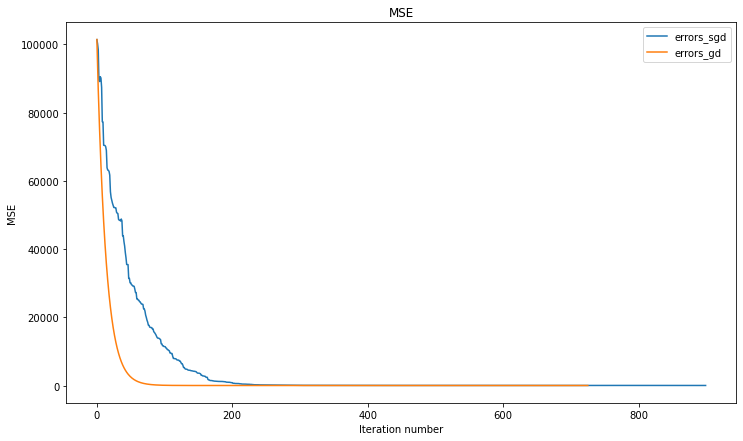

In [8]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize = (12, 7))
max_len = max(len(errors_sgd), len(errors_gd))
plt.plot(range(max_len), errors_sgd, errors_gd)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(['errors_sgd', 'errors_gd']);

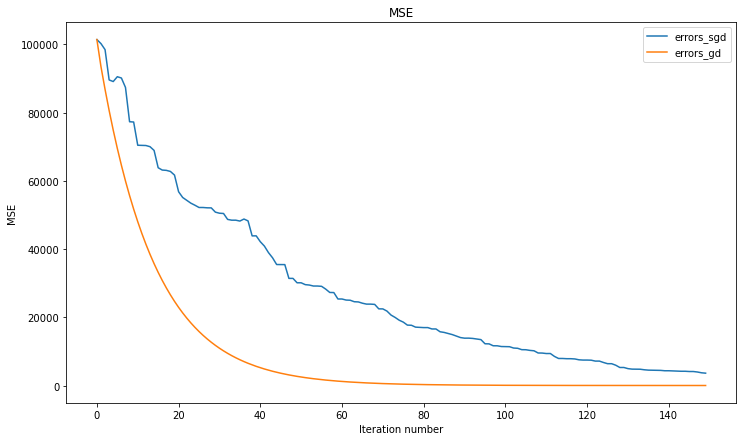

In [9]:
plt.figure(figsize = (12, 7))
# посмотрим поближе начальный участок: iter_num от 0 до first_part
first_part = 150
plt.plot(range(first_part), errors_sgd[:first_part], errors_gd[:first_part])
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(['errors_sgd', 'errors_gd']);

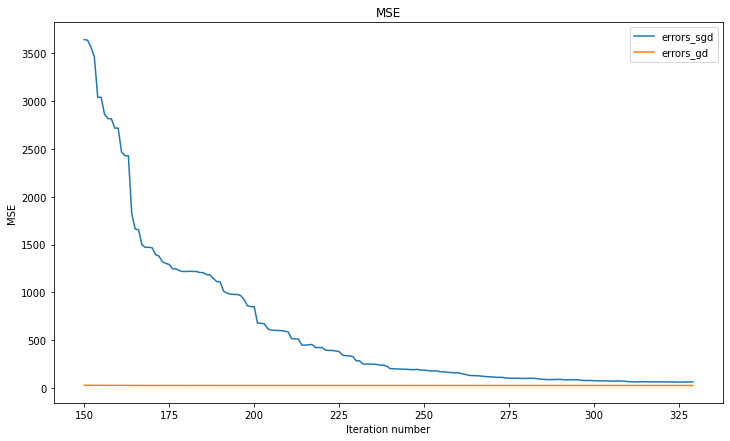

In [10]:
plt.figure(figsize = (12, 7))
# посмотрим поближе средний участок: iter_num от first_part до second_part
second_part = 330
plt.plot(range(first_part, second_part), errors_sgd[first_part:second_part], range(first_part, second_part), errors_gd[first_part:second_part])
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(['errors_sgd', 'errors_gd']);

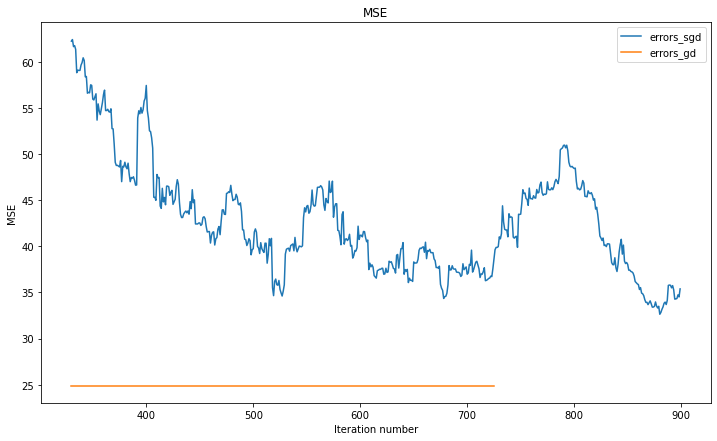

In [11]:
plt.figure(figsize = (12, 7))
# посмотрим поближе финальный участок: iter_num от second_part и до финала
plt.plot(range(second_part, len(errors_sgd)), errors_sgd[second_part:len(errors_sgd)], range(second_part, len(errors_gd)), errors_gd[second_part:len(errors_gd)])
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(['errors_sgd', 'errors_gd']);

Графики показывают, что __в зависимости от числа итераций sgd сходится медленне и в финале уменьшает ошибку хуже gd__

Более того, gd вышел из расчетов по достижению критерия сходимости на 726 цикле (разница весов на предидущем и последующем шаге итераций стала меньше min_weight_dist = 1e-8) . А sgd вышел из цикла по ограничению количества итераций на 900 цикле, то есть этот алгоритм не сошелся к 900 шагу.

In [12]:
len(errors_gd), len(errors_sgd)

(726, 900)

Общий вывод: __sgd по времени работает быстрее, но он не в состоянии достигнуть точности gd__

Напрашивается такой вариант применения комбинации sgd и gd:
    
Стартовую работу выполняет sgd, а затем для более качественного завершения расчетов стоит подключать gd

__Задача 2.__ Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).

Для начала восстановим контекст. Далее идет часть материала из лекции - задача и код для ее решения.

##### Задача: предсказание баллов ЕГЭ ученика

In [13]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [14]:
y = np.array([45, 55, 50, 55, 60, 35, 75, 80, 50, 60])

##### Нормализация [0, 1]

In [15]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [16]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [17]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm[:, 3] = min_max_scale(X_norm[:, 3])
X_norm

array([[1.        , 0.1       , 0.03225806, 0.        ],
       [1.        , 0.1       , 0.16129032, 0.        ],
       [1.        , 0.2       , 0.19354839, 0.5       ],
       [1.        , 0.5       , 0.09677419, 0.        ],
       [1.        , 0.3       , 0.64516129, 0.5       ],
       [1.        , 0.        , 0.22580645, 0.        ],
       [1.        , 0.5       , 0.67741935, 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 0.1       , 0.        , 0.        ],
       [1.        , 0.2       , 0.35483871, 0.5       ]])

In [18]:
# истинные веса
w_th = np.linalg.solve((X_norm.T).dot(X_norm), (X_norm.T).dot(y))
w_th

array([44.31068418, 22.28480075, -1.13921685, 16.82782676])

##### Gradient descent

In [19]:
W = np.random.randn(X.shape[1])
W

array([0.44641866, 1.59680941, 0.82204692, 1.60121368])

In [20]:
# классический  GD
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [21]:
gradient_descent(X_norm, y, iterations=5000, eta=1e-2)

Iter: 0, weights: [ 1.09992831 -0.03999797  1.02085236 -0.18307484], error 3380.551026646507
Iter: 500, weights: [43.6073545  13.68161449 12.38156311 12.78464861], error 28.755638832043246
Iter: 1000, weights: [44.09421891 14.99838809 10.55636747 12.3375491 ], error 27.59455780846618
Iter: 1500, weights: [44.13691294 16.24473526  9.23953598 12.45673753], error 26.93072520851909
Iter: 2000, weights: [44.13372716 17.2639155   8.1067796  12.69052336], error 26.453988805183712
Iter: 2500, weights: [44.13168742 18.0848958   7.10359726 12.96210919], error 26.102240844071087
Iter: 3000, weights: [44.13448297 18.74853606  6.2110792  13.24775868], error 25.837905991727023
Iter: 3500, weights: [44.14095965 19.28850648  5.41623894 13.53477202], error 25.63633373907203
Iter: 4000, weights: [44.14980315 19.7309782   4.70809058 13.81503065], error 25.480861170869353
Iter: 4500, weights: [44.16001164 20.09616386  4.07699212 14.08331221], error 25.35990136733379
Final MSE: 25.265181105477012


array([44.17084637, 20.39915192,  3.51548581, 14.33594022])

In [22]:
gradient_descent(X_norm, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [11.94368224  4.74554277  5.05631641  4.93237237], error 3167.3351973388712
Iter: 500, weights: [44.17591837 20.49948786  3.30576234 14.43844785], error 25.234605660422805
Iter: 1000, weights: [44.26057505 21.8010669   0.28297107 16.00776159], error 24.938090226344823
Iter: 1500, weights: [44.2942155  22.13488847 -0.6834178  16.56175022], error 24.908057924854806
Iter: 2000, weights: [44.30538059 22.23703961 -0.9930924  16.74233533], error 24.904972377409468
Iter: 2500, weights: [44.30898241 22.26950565 -1.09236826 16.80040646], error 24.904655213822107
Iter: 3000, weights: [44.31013849 22.279898   -1.12419669 16.81903487], error 24.90462261204289
Iter: 3500, weights: [44.31050922 22.28322893 -1.13440122 16.82500794], error 24.904619260849362
Iter: 4000, weights: [44.31062809 22.28429681 -1.13767291 16.82692301], error 24.90461891637434
Iter: 4500, weights: [44.3106662  22.28463918 -1.13872185 16.82753701], error 24.904618880965153
Final MSE: 24.904618877325394


array([44.3106784 , 22.28474883, -1.13905779, 16.82773365])

In [23]:
# истинные веса для сравнения
# array([44.31068418, 22.28480075, -1.13921685, 16.82782676])

 ##### L2 регуляризация

$$Q(w, X) + \lambda ||w||^{2} \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda ||w||^{2} = 2\lambda w $$

In [24]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err

In [25]:
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=1e-3)

Iter: 0, weights: [11.44565663  4.10731905  4.4770853   4.62679443], error 3335.6307024594266
Iter: 500, weights: [44.15253186 20.35116081  3.46045737 14.41991712], error 25.26018382747998
Iter: 1000, weights: [44.2292885  21.57262186  0.66681796 15.85847895], error 24.95924059232166
Iter: 1500, weights: [44.25877128 21.86703378 -0.18249926 16.34470079], error 24.920488855969708
Iter: 2000, weights: [44.26809927 21.95247589 -0.44134674 16.49561005], error 24.91345970483913
Iter: 2500, weights: [44.27096249 21.97828976 -0.52027165 16.54177494], error 24.91175970030268
Iter: 3000, weights: [44.27183664 21.98614805 -0.54433854 16.5558606 ], error 24.91128246034174
Iter: 3500, weights: [44.27210326 21.98854361 -0.55167746 16.56015632], error 24.911140753980764
Iter: 4000, weights: [44.27218457 21.98927407 -0.55391539 16.56146628], error 24.911097897355944
Iter: 4500, weights: [44.27220936 21.98949681 -0.55459782 16.56186575], error 24.911084861695166
Final MSE: 24.911080889675794


(array([44.27221691, 21.98956467, -0.5548057 , 16.56198743]),
 24.91108089381916)

In [26]:
# для сравнения
gradient_descent(X_norm, y, iterations=5000, eta=1e-1)

Iter: 0, weights: [11.36932877  4.8877064   3.70063186  6.08430309], error 3255.2024143856497
Iter: 500, weights: [44.19397615 20.62786094  2.8520776  14.71653124], error 25.171867298975606
Iter: 1000, weights: [44.26595794 21.8474485   0.13734226 16.09373649], error 24.931586824849852
Iter: 1500, weights: [44.29591757 22.15006406 -0.73011813 16.58912891], error 24.907389243258102
Iter: 2000, weights: [44.3059249  22.2419229  -1.00806566 16.7511024 ], error 24.904903641831424
Iter: 2500, weights: [44.30915684 22.27107233 -1.09716889 16.80321665], error 24.90464814837029
Iter: 3000, weights: [44.31019441 22.28040035 -1.12573583 16.81993581], error 24.90462188577282
Iter: 3500, weights: [44.31052715 22.28339    -1.13489468 16.82529679], error 24.904619186194793
Iter: 4000, weights: [44.31063383 22.28434845 -1.13783112 16.82701562], error 24.904618908700467
Iter: 4500, weights: [44.31066804 22.28465574 -1.13877257 16.8275667 ], error 24.904618880176333
Final MSE: 24.904618877244296


array([44.31067899, 22.28475415, -1.13907409, 16.82774319])

Итак, контекст восстановлен. Теперь решаем задачу.

__Решение 2__

##### L1 регуляризация

$$Q(w, X) + \lambda |w| \rightarrow \underset{w}{\text{min}}.$$

<center>Производная</center>

$$d\lambda |w| = \lambda $$

Напишем функцию, реализующую L1 регуляризацию

In [27]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        # ИЗМЕНЕНИЯ
        dReg = reg # градиент регуляризации      
                
        W -= eta * (dQ + dReg)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, err

Попробуем посчитать

In [28]:
gradient_descent_reg_l1(X_norm, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.37348617  3.60382646  4.75247638  2.56271615], error 3499.486189053989
Iter: 500, weights: [44.16297458 20.407662    3.63144649 14.2383367 ], error 25.283884791874254
Iter: 1000, weights: [44.25679641 21.76739851  0.38734855 15.946134  ], error 24.94318913095811
Iter: 1500, weights: [44.29308487 22.12359703 -0.65011681 16.54224945], error 24.908580447213083
Iter: 2000, weights: [44.30508198 22.23314039 -0.98258654 16.73620817], error 24.90502554978017
Iter: 2500, weights: [44.30894956 22.26798919 -1.08917119 16.79855928], error 24.904660518571816
Iter: 3000, weights: [44.31019079 22.27914623 -1.12334294 16.81855944], error 24.904623117289525
Iter: 3500, weights: [44.31058882 22.28272237 -1.13429876 16.82497229], error 24.904619311487004
Iter: 4000, weights: [44.31071643 22.28386887 -1.13781132 16.82702836], error 24.904618932701354
Iter: 4500, weights: [44.31075735 22.28423645 -1.13893749 16.82768756], error 24.904618897747078
Final MSE: 24.904618895430637


(array([44.31077045, 22.28435417, -1.13929816, 16.82789868]),
 24.904618895430815)

In [29]:
# для сравнения
gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [12.03786426  3.3772074   4.76657508  5.11145307], error 3233.7318651228443
Iter: 500, weights: [44.17777259 20.41917663  3.3378357  14.46503323], error 25.241018369105813
Iter: 1000, weights: [44.25753245 21.77275932  0.32692577 15.99189323], error 24.940181891186484
Iter: 1500, weights: [44.2905899  22.10676368 -0.63035599 16.5385466 ], error 24.9089023397054
Iter: 2000, weights: [44.30157798 22.2076303  -0.93554988 16.71639587], error 24.905309917461057
Iter: 2500, weights: [44.30510898 22.23947734 -1.03289853 16.77333254], error 24.904812919369505
Iter: 3000, weights: [44.3062369  22.24961763 -1.06395297 16.79150754], error 24.90472040610158
Iter: 3500, weights: [44.3065968  22.25285135 -1.07385957 16.7973062 ], error 24.90469761282759
Iter: 4000, weights: [44.30671162 22.25388287 -1.07701987 16.79915607], error 24.90469102532793
Iter: 4500, weights: [44.30674824 22.25421194 -1.07802803 16.79974619], error 24.904688993438523
Final MSE: 24.904688352328776


(array([44.30675992, 22.2543168 , -1.07834929, 16.79993425]),
 24.904688353014024)

теперь исследуем зависимость влияния коэффициентов регуляризации L1 и L2 на ошибку и величину весов для этого примера из урока

In [36]:
# сделаем исследование для таких значений eta:
etas = [0.01, 0.025, 0.05, 0.1, 0.5, 1.0]

err_g_d__reg_l1 = []
err_g_d__reg_l2 = []
W_g_d__reg_l1 = []
W_g_d__reg_l2 = []

for eta in etas:
    W, err = gradient_descent_reg_l1(X_norm, y, iterations=5000, eta=eta, reg=1e-4)
    err_g_d__reg_l1.append(err)
    W_g_d__reg_l1.append(W)
    W, err = gradient_descent_reg_l2(X_norm, y, iterations=5000, eta=eta, reg=1e-4)
    err_g_d__reg_l2.append(err)
    W_g_d__reg_l2.append(W)
    

Iter: 0, weights: [-0.23691696 -0.02941811  0.14504342  1.48996392], error 3494.79701847191
Iter: 500, weights: [43.58352245 13.62518597 11.36051142 13.83331369], error 28.570934015038556
Iter: 1000, weights: [44.14570173 14.96954355  9.58363906 13.15227591], error 27.34015922261873
Iter: 1500, weights: [44.18876368 16.26346992  8.36218139 13.14325117], error 26.702812356010458
Iter: 2000, weights: [44.17830633 17.31768858  7.32146025 13.27900936], error 26.258648692070956
Iter: 2500, weights: [44.16942579 18.16123912  6.40155125 13.46989354], error 25.93881021511188
Iter: 3000, weights: [44.16652702 18.83807763  5.58369585 13.68792976], error 25.703270957549552
Iter: 3500, weights: [44.16831603 19.38454598  4.85568562 13.91783399], error 25.526554549053024
Iter: 4000, weights: [44.17328362 19.82883213  4.20732167 14.14954859], error 25.3919712078521
Iter: 4500, weights: [44.18026604 20.1926343   3.62968497 14.37633015], error 25.28827063835363
Final MSE: 25.207650979320228
Iter: 0, we

Iter: 4000, weights: [44.3067654  22.25436608 -1.0785003  16.80002263], error 24.90468805318043
Iter: 4500, weights: [44.3067654  22.25436608 -1.0785003  16.80002263], error 24.90468805318043
Final MSE: 24.90468805318043
Iter: 0, weights: [111.9474769   38.81665401  43.05945314  47.92279442], error 3213.0551292657274
Iter: 500, weights: [1.27598262e+132 4.68464844e+131 5.36980122e+131 5.76949223e+131], error 1.049437627360937e+264
Iter: 1000, weights: [2.32103514e+262 8.52145904e+261 9.76776416e+261 1.04948092e+262], error inf
Iter: 1500, weights: [nan nan nan nan], error nan
Iter: 2000, weights: [nan nan nan nan], error nan
Iter: 2500, weights: [nan nan nan nan], error nan
Iter: 3000, weights: [nan nan nan nan], error nan
Iter: 3500, weights: [nan nan nan nan], error nan
Iter: 4000, weights: [nan nan nan nan], error nan
Iter: 4500, weights: [nan nan nan nan], error nan
Final MSE: nan
Iter: 0, weights: [113.35411675  37.38849381  45.68116887  48.97644026], error 3366.182214542177
Iter:

Видно, что при превышении eta значения 1 алгоритм идет в разнос

Графики

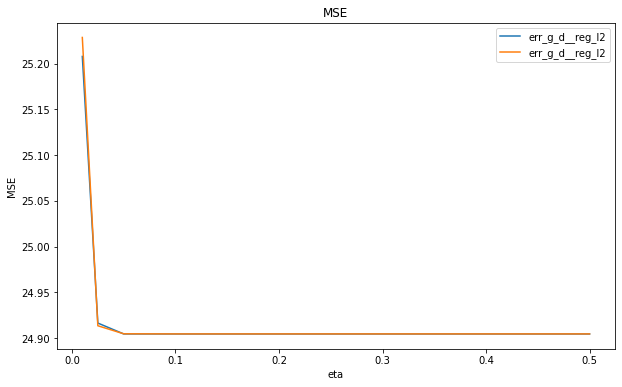

In [37]:
# Визуализируем MSE от eta для разных типов регуляризации
plt.figure(figsize = (10, 6))
plt.plot(etas, err_g_d__reg_l1, label='err_g_d__reg_l2')
plt.plot(etas, err_g_d__reg_l2, label='err_g_d__reg_l2')
plt.title('MSE')
plt.xlabel('eta')
plt.ylabel('MSE')
plt.legend();

__Честно говоря я ожидал большей разницы в результатах, при применении L1 и L2__

Теперь график с весами в зависимости от eta.

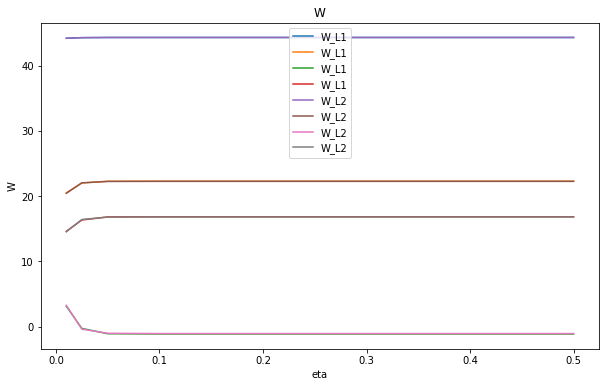

In [38]:
# Визуализируем изменение весов в зависимости от eta для разных типов регуляризации
plt.figure(figsize = (10, 6))
plt.plot(etas, W_g_d__reg_l1, label='W_L1')
plt.plot(etas, W_g_d__reg_l2, label='W_L2')
plt.title('W')
plt.xlabel('eta')
plt.ylabel('W')
plt.legend();

__Могу только повторить. Честно говоря я ожидал большей разницы от работы L1 и L2__

У нас вектор весов состоит из четырех элементов. Может из за масштаба разница не очень заметна. Возьмем для примера третий вес и посмотрим поближе его судьбу.

In [39]:
W_g_d__reg_l1 = np.array(W_g_d__reg_l1)
W_g_d__reg_l1[:, 2]

array([ 3.11588201, -0.28893916, -1.1018137 , -1.13930406, -1.13946894,
               nan])

In [40]:
W_g_d__reg_l2 = np.array(W_g_d__reg_l2)
W_g_d__reg_l2[:, 2]

array([ 3.25797806, -0.40125151, -1.03316484, -1.07835462, -1.0785003 ,
               nan])

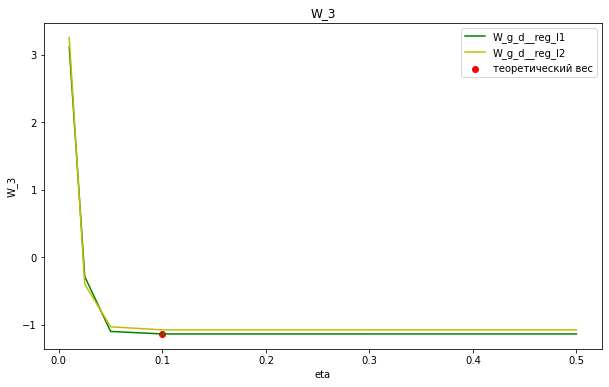

In [41]:
# Визуализируем изменение третьего веса в зависимости от eta для разных типов регуляризации
plt.figure(figsize = (10, 6))
plt.plot(etas, W_g_d__reg_l1[:, 2], color='g', label='W_g_d__reg_l1')
plt.plot(etas, W_g_d__reg_l2[:, 2], color='y', label='W_g_d__reg_l2')
plt.title('W_3')
plt.xlabel('eta')
plt.ylabel('W_3')
plt.scatter(etas[3], w_th[2], c='r', label='теоретический вес')
plt.legend();

Значимой разницы обнаружить не удалось. __То есть в этом примере веса ведут себя достаточно одинаково при L1 и L2 регуляризации__

### Задания из методички

1. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

__Задача аналогична решенной выше под номером 2__

2. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

__На мой взгляд одновременно не возможно. Видимо можно сделать сначала нормализацию, а затем стандартизацию. Но, если я правильно понимаю математику процесса, то результат будет такой словно нормализации и не было.__

3. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

__Задача аналогична решенной выше под номером 1__